In [1]:
import mysql.connector
import os


# Source .env file
from dotenv import load_dotenv
load_dotenv()

passwordENV = os.environ.get('LOCAL_DB_PASSWORD')

# Connection configuration
configLocal = {
    'user': 'dan',
    'password': passwordENV,
    'host': 'localhost',
    'port': '3307',
    'database': 'main'
}
# Connect to MariaDB
connectionLocal = mysql.connector.connect(**configLocal)
cursor = connectionLocal.cursor()

In [2]:
# TODO DC: filter out non-english sources for LDA

# qry = "SELECT id, datetime, newsource, headline, pagetitle, pageurl FROM main.headlines WHERE headline LIKE '%Taylor Swift%'"
qry = "SELECT id, datetime, newsource, headline, pagetitle, pageurl FROM main.headlines ORDER BY RAND() LIMIT 50"

data = []
cursor.execute(qry)
for (id, datetime, newssource, headline, pagetitle, pageurl) in cursor:  
  data.append([
    str(headline),
    str(newssource),
    datetime,
  ])
  
cursor.close()

True

In [3]:
from Corpus import Corpus as c

corpus = c.Corpus(data)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [4]:
corpus.initLDA(
  numTopics=10,
  passes=1,
  workers=4,
)

In [5]:
perplexities = []
coherences = []

In [6]:
for i in range(0, 1):
  corpus.trainLDA()
  [perplexity, coherence] = corpus.assessLDA()
  
  perplexities.append(perplexity)
  coherences.append(coherence)
  
  print(str(i) + ' Perplexity: ' + str(perplexity), end='\r')
  
  
  

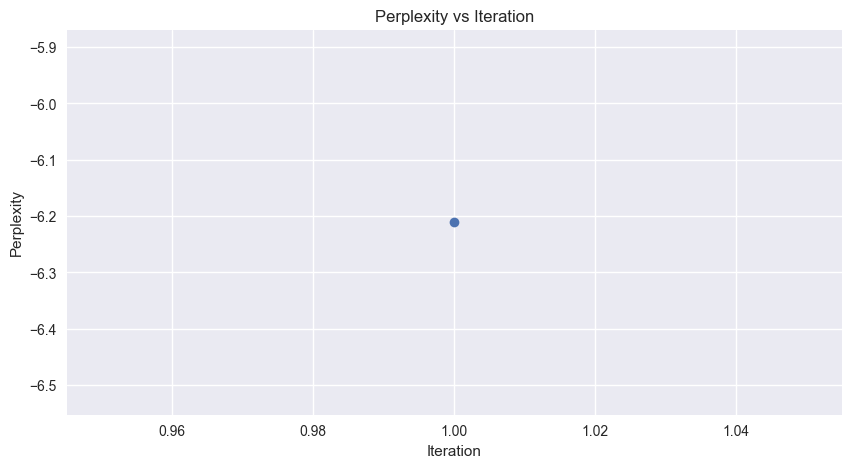

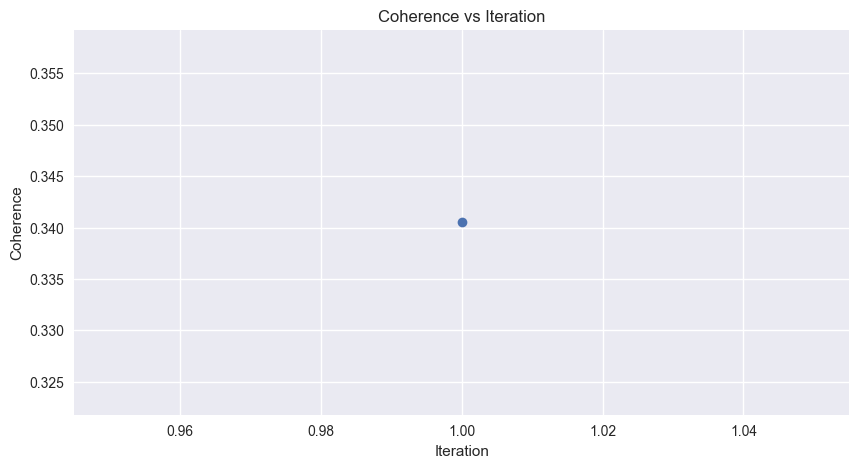

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Remove previous plots
plt.close('all')

# Plot perplexities
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(perplexities) + 1), perplexities, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Iteration')
plt.show()

# Plot coherences
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(coherences) + 1), coherences, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Coherence')
plt.title('Coherence vs Iteration')
plt.show()

In [11]:
corpus.save("../pickle/temp/test")